## Abizar Al Gifari Rahman_Assignment1 AIMML-02

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
df_titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [5]:
df_titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [6]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

## klasifikasi penumpang berdasrkan jenis klamin, umur dan kelas tiket

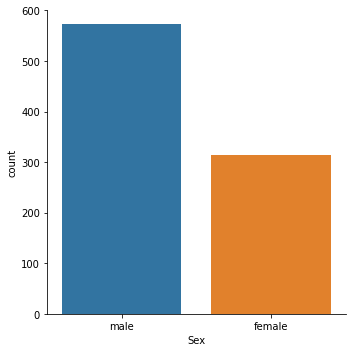

In [11]:
sns.catplot(x='Sex', kind='count', data=df_titanic, orient='h')

## Distribusi Umur Penumpang

<AxesSubplot:>

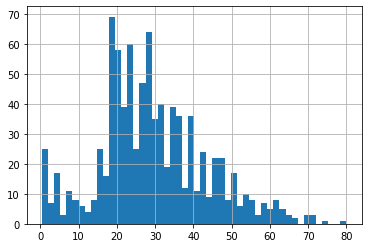

In [12]:
df_titanic['Age'].hist(bins=50)

## Mendefinisikan Penumpang Anak-Anak

In [9]:
def mfc(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
df_titanic['gac'] = df_titanic[['Age','Sex']].apply(mfc,axis=1)
df_titanic
#gac =gender and child

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,gac
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,male
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,female
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,female
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,female
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,male
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,male
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,female
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,child
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,male


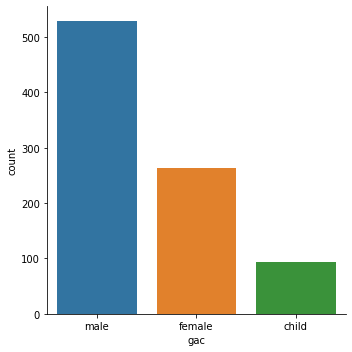

In [37]:
sns.catplot(x='gac', kind='count', data=df_titanic, orient='h')

## Distribusi Umur Penumpang Berdasarkan tiket

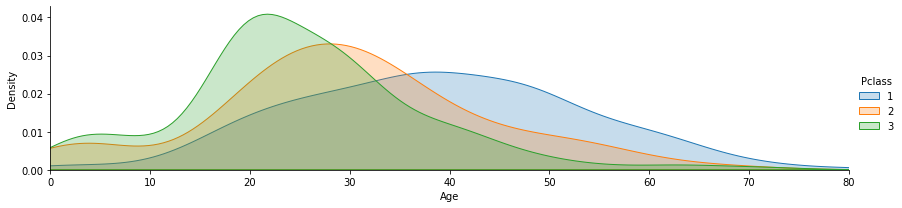

In [17]:
fig = sns.FacetGrid(df_titanic, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df_titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

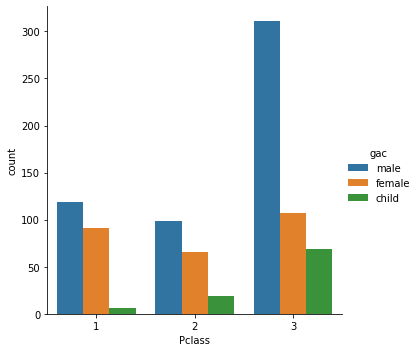

In [34]:
sns.catplot(x='Pclass',kind='count', hue='gac', data=df_titanic)

## Perbandingan Penumpang Sendirian dengan Keluarga

In [15]:
df_titanic['CPFA'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard']
df_titanic['CPFA']
#CFA=Comparison of passengers with family and alone

0      1
1      1
2      0
3      1
4      0
      ..
882    0
883    0
884    3
885    0
886    0
Name: CPFA, Length: 887, dtype: int64

In [16]:
df_titanic['CPFA'].loc[df_titanic['CPFA'] == 0] = 'With Family'
df_titanic['CPFA'].loc[df_titanic['CPFA'] == 0] = 'Alone'
df_titanic.head()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,gac,CPFA
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,male,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,female,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,female,With Family
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,female,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,male,With Family


In [17]:
df_titanic['CPFA']

0                1
1                1
2      With Family
3                1
4      With Family
          ...     
882    With Family
883    With Family
884              3
885    With Family
886    With Family
Name: CPFA, Length: 887, dtype: object

Alone          533
With Family    354
Name: CPFA, dtype: int64

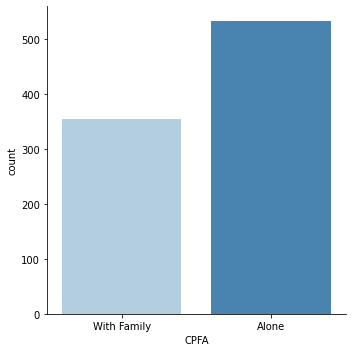

In [35]:
sns.catplot(x='CPFA',kind='count',data=df_titanic,palette='Blues')
df_titanic['CPFA'].value_counts()

## Perbandingan Penumpang selamat dan tidak selamat

not safe    545
safe        342
Name: Survivor, dtype: int64

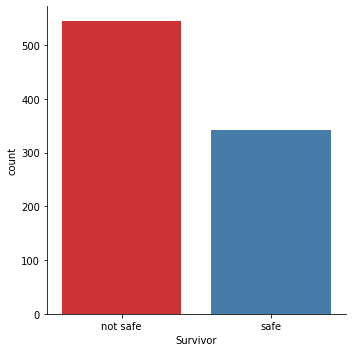

In [32]:
df_titanic['Survivor'] = df_titanic.Survived.map({0:'not safe',1:'safe'})
sns.catplot(x='Survivor',kind='count',data=df_titanic,palette='Set1')
df_titanic['Survivor'].value_counts()



## Faktor yang mempengaruhi tingkat keselamatan

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


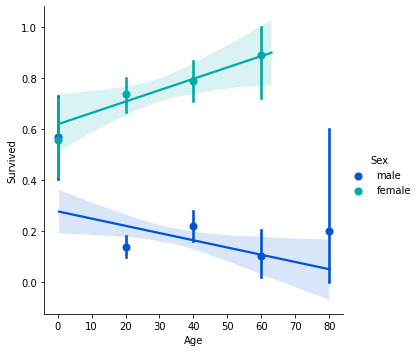

In [3]:
#umur dan jenis kelamin
generations =0, 20, 40, 60, 80


sns.lmplot('Age','Survived',hue='Sex',data=df_titanic,palette='winter',x_bins=generations)

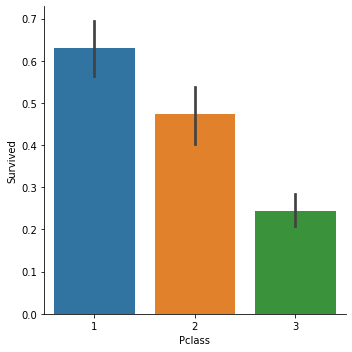

In [11]:
#faktor Tiket dan Jenis Kelamin+anak-anak
sns.catplot(x='Pclass',y='Survived',kind='bar',data=df_titanic)

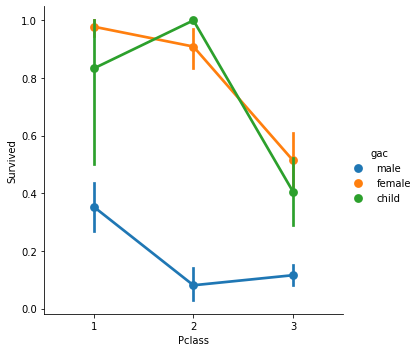

In [12]:
sns.catplot(x='Pclass',y='Survived',hue='gac',kind='point',data=df_titanic)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


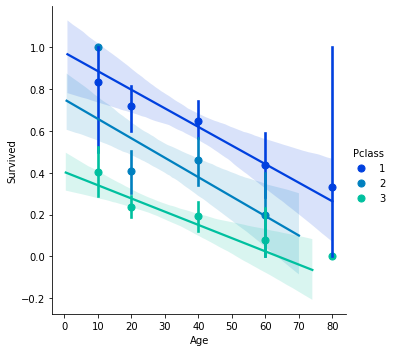

In [13]:
#umur dan Pclass
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=df_titanic,palette='winter',x_bins=generations)

In [18]:
#jumlah keluarga
df_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'gac', 'CPFA'],
      dtype='object')

In [19]:
df_titanic['Relatives'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard']
df_titanic['Relatives']
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,gac,CPFA,Relatives
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,male,1,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,female,1,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,female,With Family,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,female,1,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,male,With Family,0


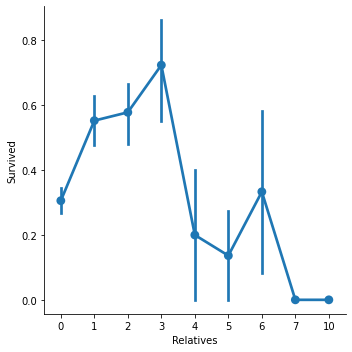

In [20]:
sns.catplot(x='Relatives',y='Survived',kind='point',data=df_titanic)